In [40]:
from pylab import *

import skimage
from skimage import color
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import util

from scipy import ndimage

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np

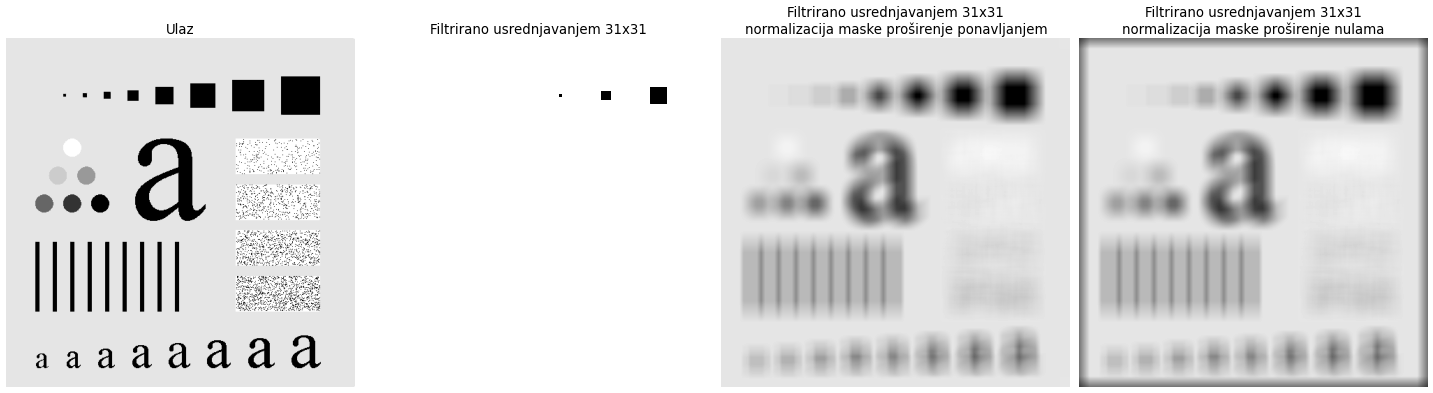

In [41]:
img = util.img_as_float(io.imread('test_pattern.tif'))

filter_mask = np.ones(shape=(31,31), dtype='uint8')
img_blurred = ndimage.correlate(img, filter_mask)

filter_mask_norm = filter_mask/np.sum(filter_mask.flatten())
img_blurred_norm = ndimage.correlate(img, filter_mask_norm)
img_blurred_norm_zp = ndimage.correlate(img, filter_mask_norm, mode='constant')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,8), dpi=60)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray'); ax[0].set_axis_off(); ax[0].set_title('Ulaz', fontsize=16)
ax[1].imshow(img_blurred, cmap='gray', vmin=0, vmax=1); ax[1].set_axis_off(); ax[1].set_title('Filtrirano usrednjavanjem 31x31', fontsize=16)
ax[2].imshow(img_blurred_norm, cmap='gray', vmin=0, vmax=1); ax[2].set_axis_off(); ax[2].set_title('Filtrirano usrednjavanjem 31x31\nnormalizacija maske proširenje ponavljanjem', fontsize=16)
ax[3].imshow(img_blurred_norm_zp, cmap='gray', vmin=0, vmax=1); ax[3].set_axis_off(); ax[3].set_title('Filtrirano usrednjavanjem 31x31\nnormalizacija maske proširenje nulama', fontsize=16)
plt.tight_layout()

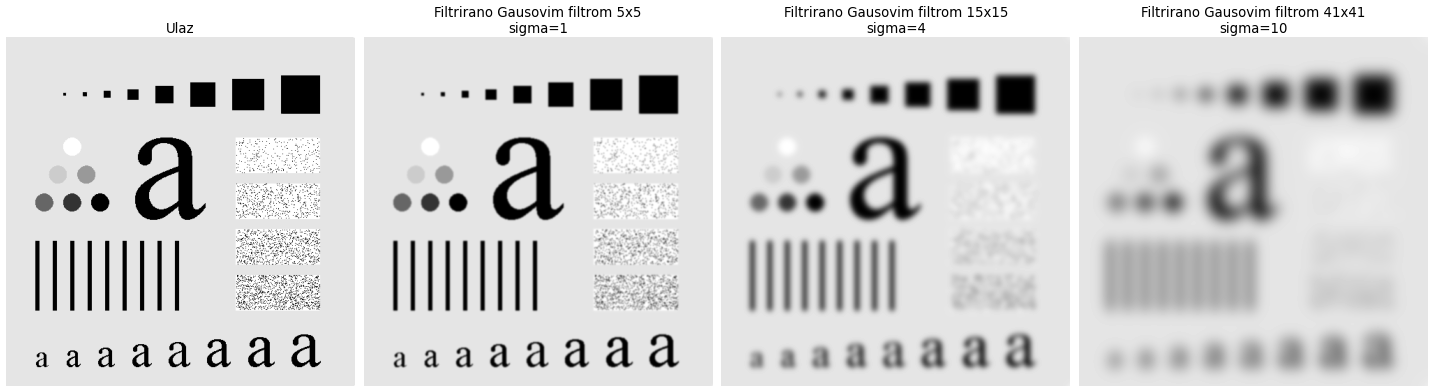

In [42]:
img_gauss_5 = filters.gaussian(img, sigma=1, truncate=5)
img_gauss_15 = filters.gaussian(img, sigma=4, truncate=3.75)
img_gauss_41 = filters.gaussian(img, sigma=10, truncate=4.1)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,8), dpi=60)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray'); ax[0].set_axis_off(); ax[0].set_title('Ulaz', fontsize=16)
ax[1].imshow(img_gauss_5, cmap='gray', vmin=0, vmax=1); ax[1].set_axis_off(); ax[1].set_title('Filtrirano Gausovim filtrom 5x5\nsigma=1', fontsize=16)
ax[2].imshow(img_gauss_15, cmap='gray', vmin=0, vmax=1); ax[2].set_axis_off(); ax[2].set_title('Filtrirano Gausovim filtrom 15x15\nsigma=4', fontsize=16)
ax[3].imshow(img_gauss_41, cmap='gray', vmin=0, vmax=1); ax[3].set_axis_off(); ax[3].set_title('Filtrirano Gausovim filtrom 41x41\nsigma=10', fontsize=16)
plt.tight_layout()

In [43]:
#Specificiranje proizvoljne prostorne maske

x = list(range(-2,3))
y = list(range(-2,3))

X, Y = meshgrid(x, y)

print("X = " + str(X) + "\n")
print("Y = " + str(Y) + "\n")

#Poređenje sa ugrađenom Gausovom maskom istih dimenzija

sigma = 1
filter_mask = (1/(2*np.pi*np.square(sigma)))*exp(-(np.square(X)+np.square(Y))/(np.square(sigma)*2))

dirac = np.zeros((5,5))
dirac[2,2] = 1
gauss_5 = filters.gaussian(dirac, sigma=1, truncate=5)

print(sum(gauss_5.flatten()))

print("filter_mask = " + str(filter_mask) + "\n")
print("gauss_5x5   = " + str(gauss_5) + "\n")
print("diff   = " + str(gauss_5-filter_mask) + "\n")

X = [[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]

Y = [[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]

0.9818147744452853
filter_mask = [[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]

gauss_5x5   = [[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915495 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]

diff   = [[3.97578394e-11 1.78182271e-10 2.93772898e-10 1.78182271e-10
  3.97578394e-11]
 [1.78182271e-10 7.98557540e-10 1.31659880e-09 7.98557540e-10
  1.78182271e-10]
 [2.9377

In [48]:
img = color.rgb2gray(util.img_as_float(io.imread('text_non_uniform.jpg')))

thr_otsu = filters.threshold_otsu(img)

def image_binarization(img, thr_otsu, thr_in=0.5):
    
    img_out_bw = img > thr_in
    
    fig, ax = plt.subplots(ncols=3, figsize=(24,8), dpi=80)
    
    ax[0].imshow(img, cmap='gray', vmin=0, vmax=1); ax[0].set_title('Ulaz'); ax[0].axis('off')
    ax[1].hist(img.flatten(), bins=256); ax[1].set_title('Histogram')
    ax[1].axvline(thr_in, color='b'); ax[1].axvline(thr_otsu, color='r')
    ax[2].imshow(img_out_bw, cmap='gray', vmin=0, vmax=1); ax[2].set_title('Binarizovana slika'); ax[2].axis('off')
    
    return

In [49]:
interactive(image_binarization, img=fixed(img), thr_otsu=fixed(thr_otsu), thr_in=(0,1,0.02))

interactive(children=(FloatSlider(value=0.5, description='thr_in', max=1.0, step=0.02), Output()), _dom_classe…

In [21]:
img_filt = filters.gaussian(img, sigma=60, truncate=4)

img_details = img - img_filt
img_details = (img_details - min(img_details.flatten()))/(max(img_details.flatten())- min(img_details.flatten()))

tOtsu = filters.threshold_otsu(img_details)

In [22]:
interactive(imageBinarization, img=fixed(img_details), tOtsu=fixed(tOtsu), threshold=(0,1,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


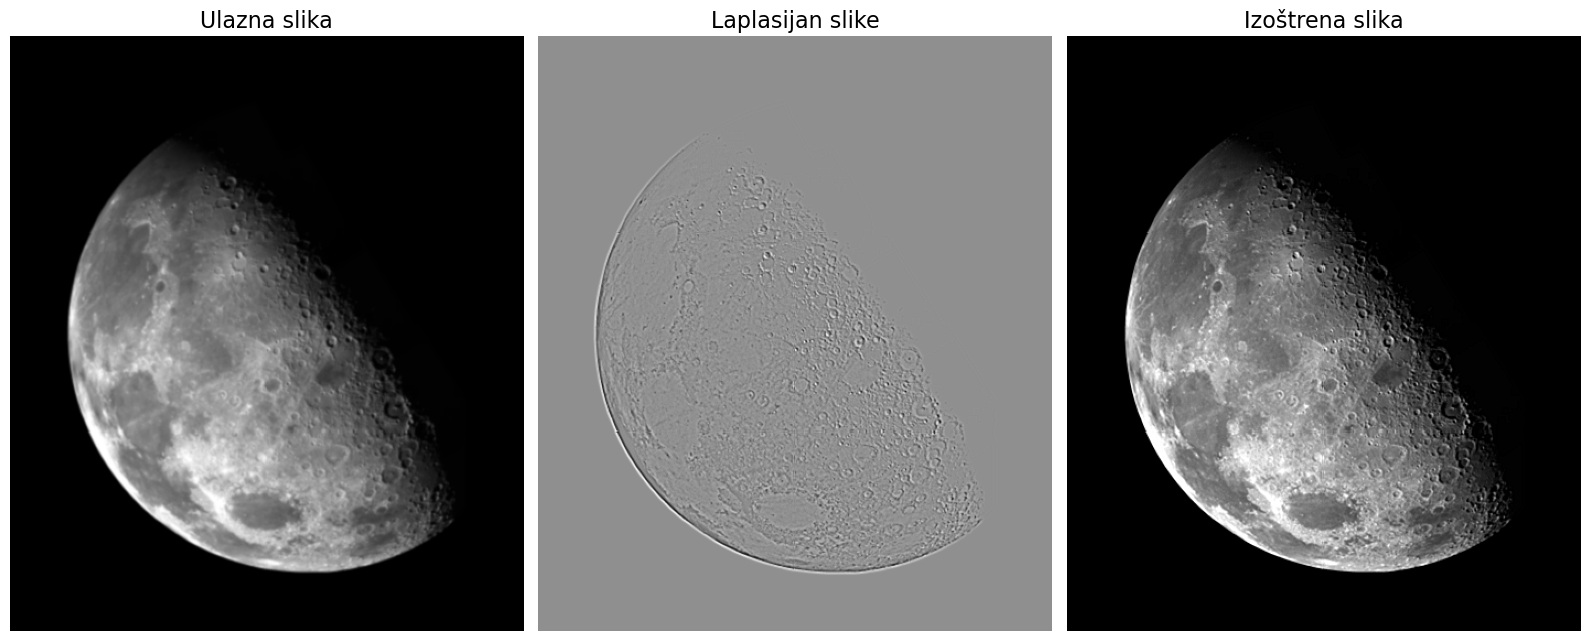

In [50]:
img = util.img_as_float(io.imread('blurry_moon.tif'))

laplacian_mask = np.array([ [0,  1, 0],
                            [1, -4, 1],
                            [0,  1, 0] ])

print(laplacian_mask)

img_lap = ndimage.correlate(img, laplacian_mask)
img_sharp = img - img_lap

img_sharp = np.clip(img_sharp, 0, 1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8), dpi=100)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray'); ax[0].set_axis_off(); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_lap, cmap='gray'); ax[1].set_axis_off(); ax[1].set_title('Laplasijan slike', fontsize=16)
ax[2].imshow(img_sharp, cmap='gray', vmin=0, vmax=1); ax[2].set_axis_off(); ax[2].set_title('Izoštrena slika', fontsize=16)

plt.tight_layout();

sharp_mask =  [[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


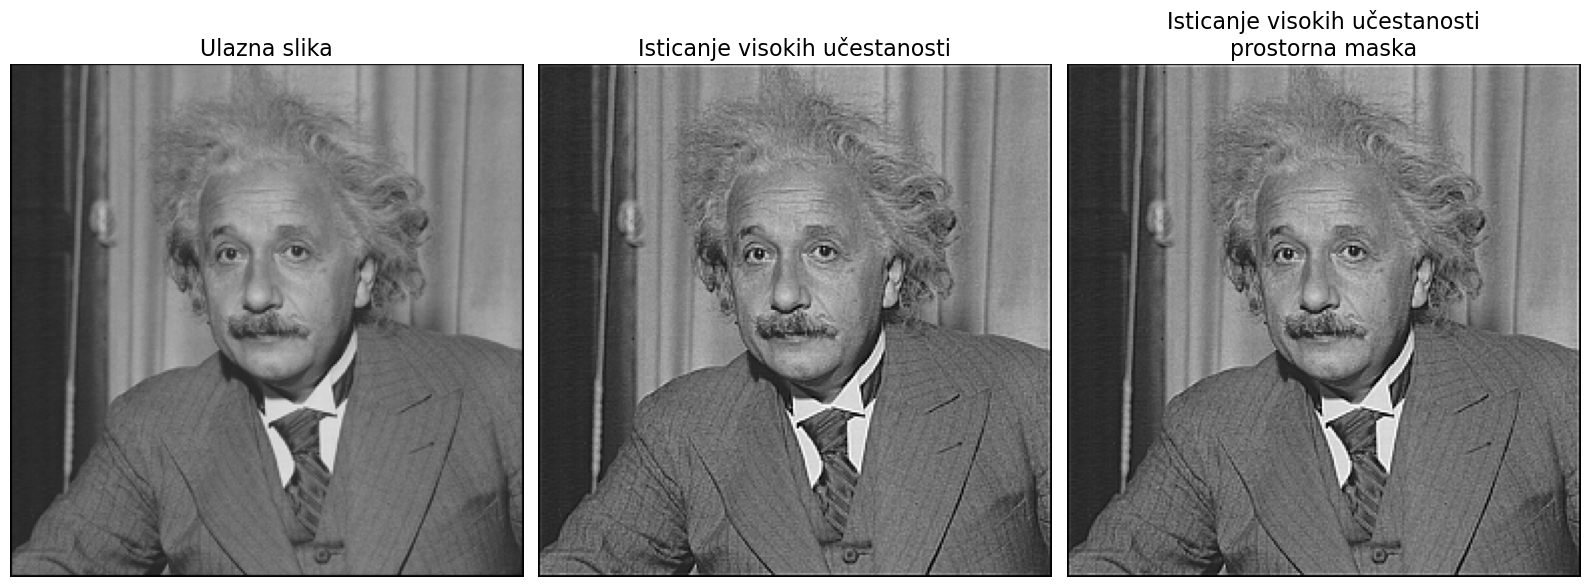

max abs diff   = 4.440892098500626e-16



In [51]:
img = util.img_as_float(io.imread('einstein.tif'))

lowpass_mask = np.ones(shape=(3,3))/9
img_blurred = ndimage.correlate(img, lowpass_mask)
img_details = img - img_blurred

img_sharp = img + img_details

img_sharp = np.clip(img_sharp, 0, 1)

sharp_mask = np.array([[-1, -1, -1],
                       [-1, 17, -1],
                       [-1, -1, -1]])/9

print("sharp_mask = ", str(sharp_mask))

img_sharp_1 = ndimage.correlate(img, sharp_mask)
img_sharp_1 = np.clip(img_sharp_1, 0, 1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8), dpi=100)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=1); ax[0].set_axis_off(); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_sharp, cmap='gray', vmin=0, vmax=1); ax[1].set_axis_off(); ax[1].set_title('Isticanje visokih učestanosti', fontsize=16)
ax[2].imshow(img_sharp_1, cmap='gray'); ax[2].set_axis_off(); ax[2].set_title('Isticanje visokih učestanosti\nprostorna maska', fontsize=16)

plt.tight_layout()
plt.show()

print("max abs diff   = " + str(max(abs(img_sharp.flatten()-img_sharp_1.flatten()))) + "\n")

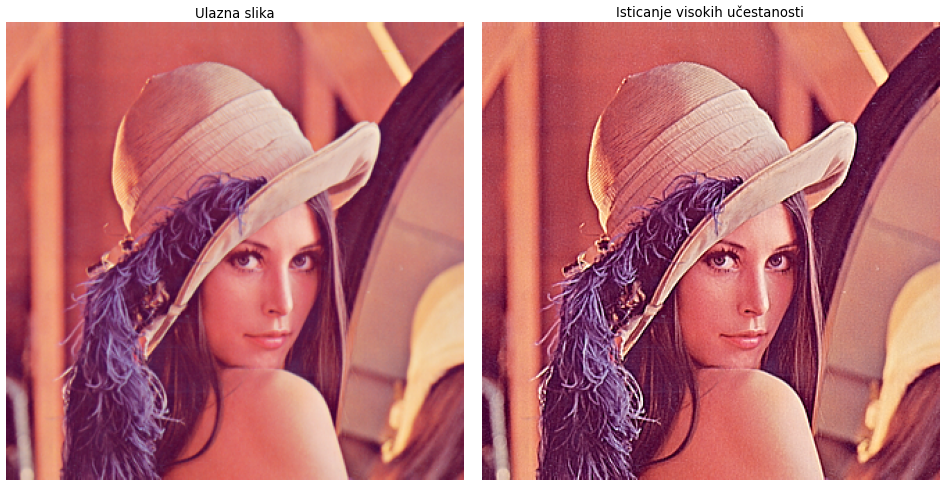

In [11]:
img_rgb = util.img_as_float(io.imread('lena.png'))

img_yuv = color.rgb2yuv(img_rgb)
img_y = img_yuv[:,:,0]

lowpass_mask = np.ones(shape=(3,3))/9
img_y_blurred = ndimage.correlate(img_y, lowpass_mask)
img_y_details = img_y - img_y_blurred

img_y_sharp = img_y + 2*img_y_details

img_yuv_out = np.zeros(shape(img_yuv))
img_yuv_out[:,:,1:3] = img_yuv[:,:,1:3]
img_yuv_out[:,:,0] = img_y_sharp

img_rgb_out = color.yuv2rgb(img_yuv_out)

img_rgb_out = np.clip(img_rgb_out, 0, 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8), dpi=60)
ax = axes.ravel()

ax[0].imshow(img_rgb, vmin=0, vmax=1); ax[0].set_axis_off(); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_rgb_out, vmin=0, vmax=1); ax[1].set_axis_off(); ax[1].set_title('Isticanje visokih učestanosti', fontsize=16)

plt.tight_layout()


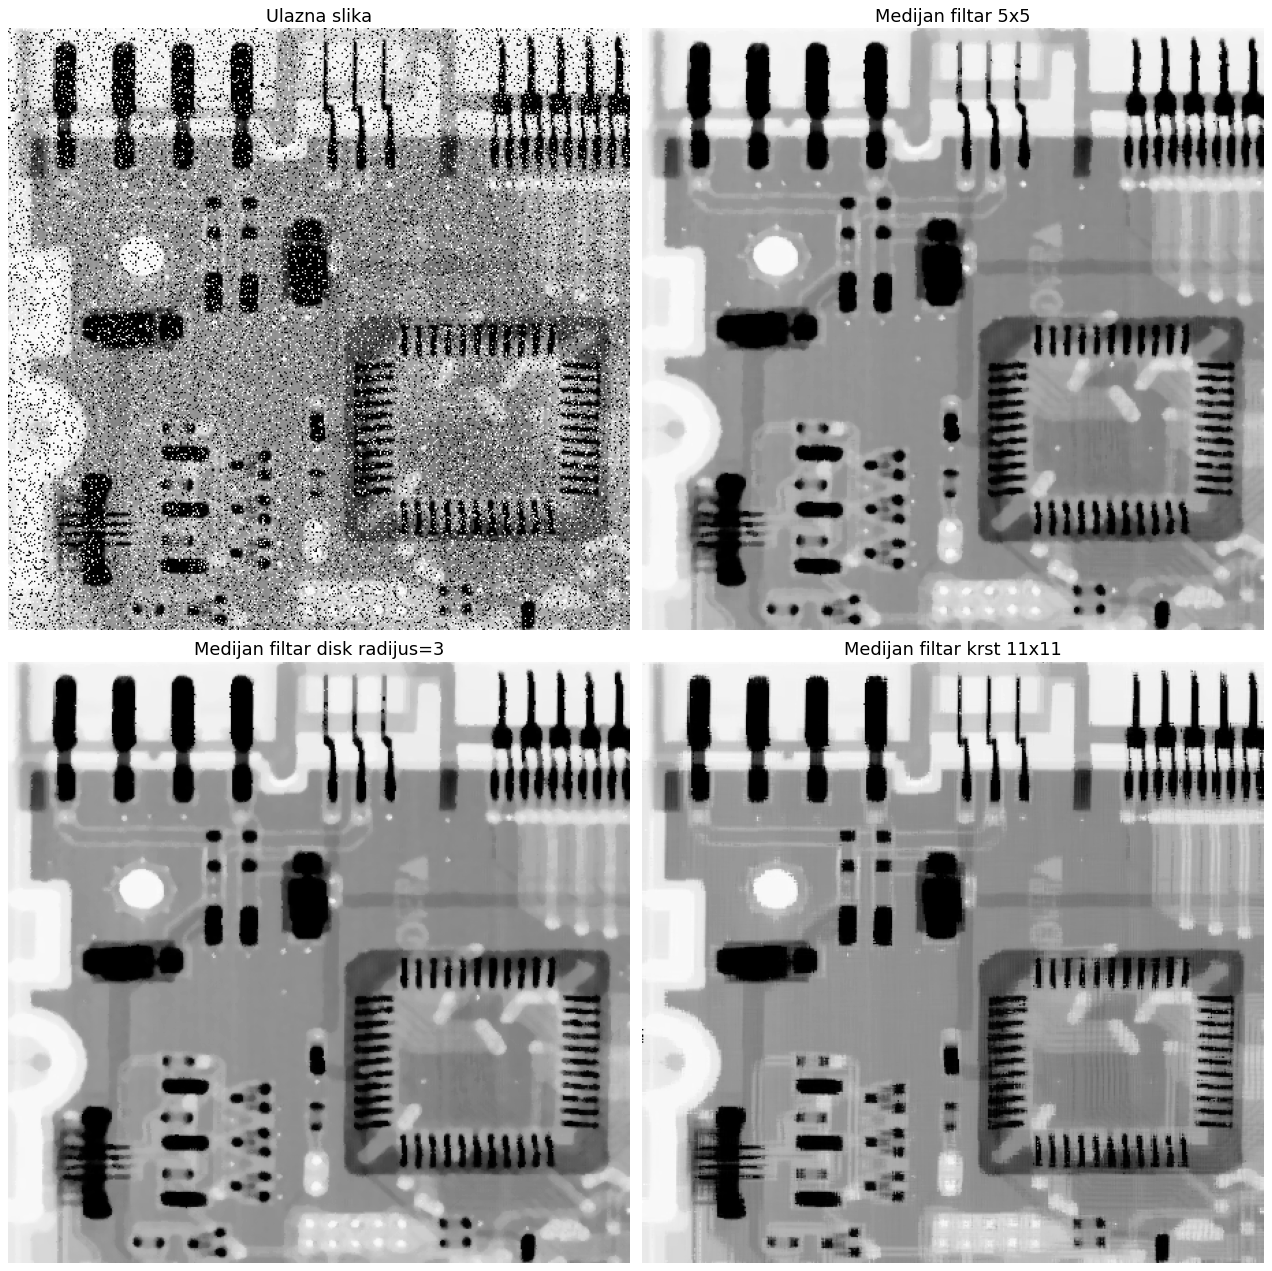

In [54]:
from skimage import morphology

img = imread('ckt_board.tif')

img_med = filters.median(img, np.ones(shape=(5,5)))

img_med_disk = filters.median(img, morphology.disk(3))

cross_dim = 11

cross = np.zeros(shape=(cross_dim,cross_dim))
cross[uint((cross_dim-1)/2),:] = 1
cross[:,uint((cross_dim-1)/2)] = 1

img_med_cross = filters.median(img, cross)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16), dpi=80)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255); ax[0].set_axis_off(); ax[0].set_title("Ulazna slika", fontsize=16)
ax[1].imshow(img_med, cmap='gray', vmin=0, vmax=255); ax[1].set_axis_off(); ax[1].set_title("Medijan filtar 5x5", fontsize=16)
ax[2].imshow(img_med_disk, cmap='gray', vmin=0, vmax=255); ax[2].set_axis_off(); ax[2].set_title("Medijan filtar disk radijus=3", fontsize=16)
ax[3].imshow(img_med_cross, cmap='gray', vmin=0, vmax=255); ax[3].set_axis_off(); ax[3].set_title("Medijan filtar krst " + str(cross_dim)+"x"+str(cross_dim), fontsize=16)

plt.tight_layout()

In [13]:
def bilinear_interpolation(img_in, scale):
    [height_in, width_in] = shape(img_in)

    height_out = round(scale*height_in)
    width_out = round(scale*width_in)

    x_out = range(0, width_out)
    y_out = range(0, height_out)

    x_in = np.asarray([(x/scale) for x in x_out])
    y_in = np.asarray([(y/scale) for y in y_out])

    x_in_0 = np.floor(x_in).astype(int); x_in_1 = x_in_0 + 1
    x_in_0 = np.clip(x_in_0, 0, width_in - 1);
    x_in_1 = np.clip(x_in_1, 0, width_in - 1);

    y_in_0 = np.floor(y_in).astype(int); y_in_1 = y_in_0 + 1
    y_in_0 = np.clip(y_in_0, 0, height_in - 1);
    y_in_1 = np.clip(y_in_1, 0, height_in - 1);


    X0, Y0 = meshgrid(x_in_0, y_in_0)
    X1, Y1 = meshgrid(x_in_1, y_in_1)
    X, Y = meshgrid(x_in, y_in)

    img_in_A = img_in[Y0, X0]
    img_in_B = img_in[Y0, X1]
    img_in_C = img_in[Y1, X0]
    img_in_D = img_in[Y1, X1]

    w_x = X1 - X
    w_y = Y1 - Y

    img_out = w_y*(w_x*img_in_A + (1-w_x)*img_in_B) + (1-w_y)*(w_x*img_in_C + (1-w_x)*img_in_D)
    
    return img_out


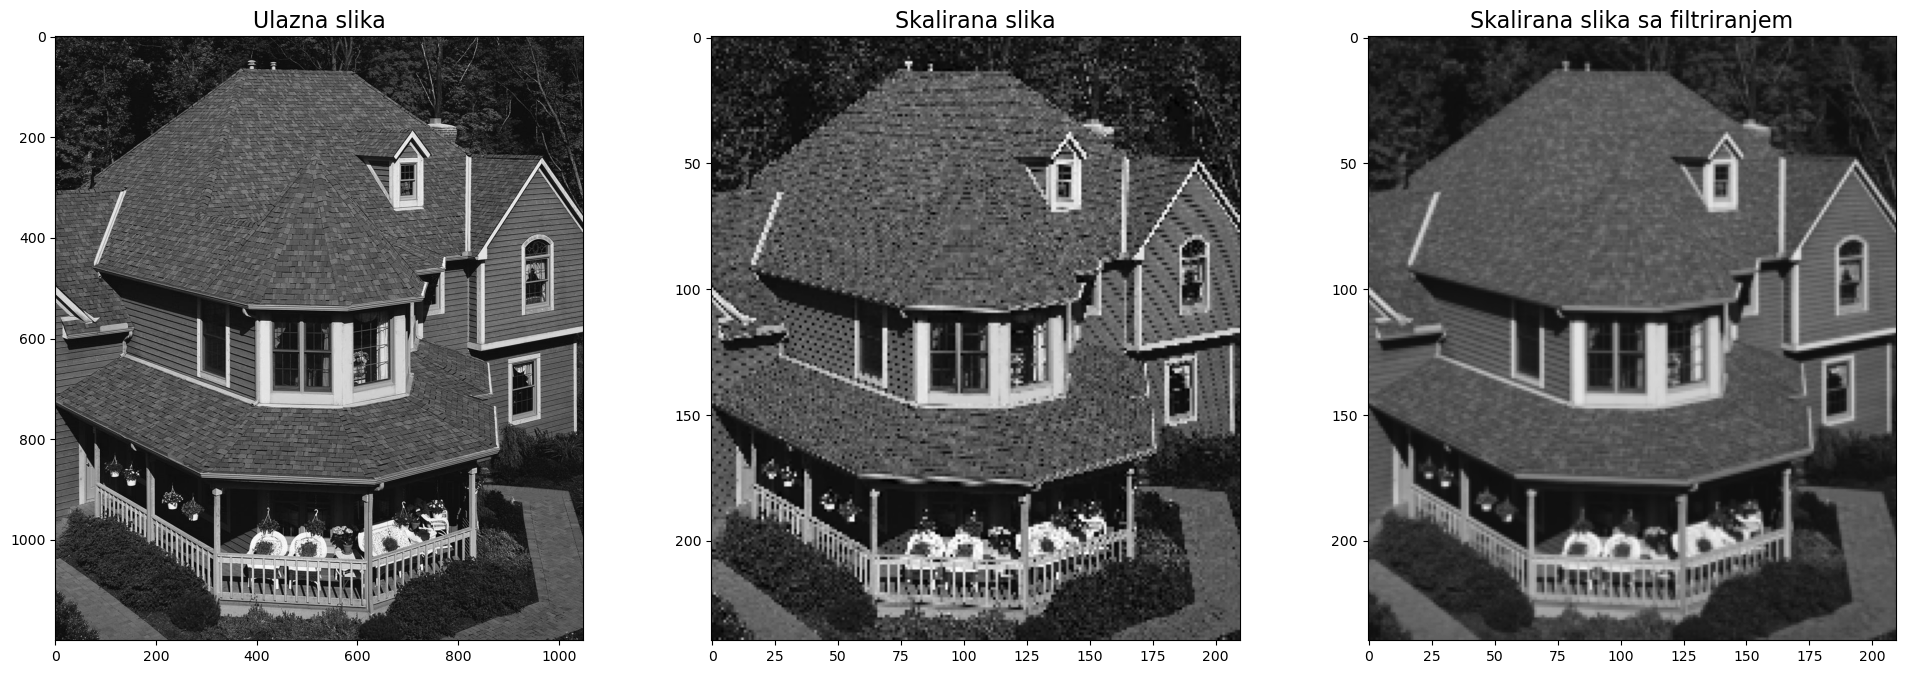

In [39]:
img_in = util.img_as_float(imread('roof.jpg'))

img_out = bilinear_interpolation(img_in, 0.2)

img_in_filt = filters.gaussian(img_in, sigma=2, truncate=3)
img_filt_out = bilinear_interpolation(img_in_filt, 0.2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8), dpi=100)
ax = axes.ravel()

ax[0].imshow(img_in, vmin=0, vmax=1, cmap='gray'); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_out, vmin=0, vmax=1, cmap='gray'); ax[1].set_title('Skalirana slika', fontsize=16);
ax[2].imshow(img_filt_out, vmin=0, vmax=1, cmap='gray'); ax[2].set_title('Skalirana slika sa filtriranjem', fontsize=16);

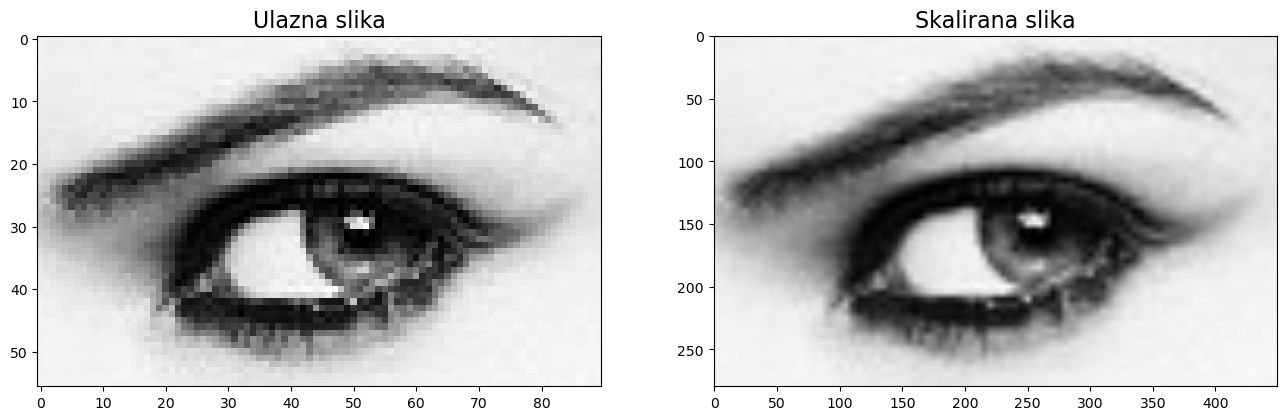

In [33]:
img_in = util.img_as_float(imread('eye.png'))

img_out = bilinear_interpolation(img_in, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8), dpi=100)
ax = axes.ravel()

ax[0].imshow(img_in, vmin=0, vmax=1, cmap='gray'); ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_out, vmin=0, vmax=1, cmap='gray'); ax[1].set_title('Skalirana slika', fontsize=16);